## Подготовка датасетов для приложения и запуск streamlit локально

In [4]:
# основные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# запуск локально streamlit
!streamlit run main_app.py

^C


In [2]:
# загружаем данные 
D_client = pd.read_csv('datasets/D_clients.csv')
D_close_loan = pd.read_csv('datasets/D_close_loan.csv')
D_job = pd.read_csv('datasets/D_job.csv')
D_last_credit = pd.read_csv('datasets/D_last_credit.csv')
D_loan = pd.read_csv('datasets/D_loan.csv')
D_pens = pd.read_csv('datasets/D_pens.csv')
D_salary = pd.read_csv('datasets/D_salary.csv')
D_target = pd.read_csv('datasets/D_target.csv')
D_work = pd.read_csv('datasets/D_work.csv')

In [3]:
# проверка на корректность 
list_data = [D_client, D_close_loan, D_job, D_last_credit, D_loan, D_pens, D_salary, D_target, D_work]

for i in list_data:
    display(i.head(5))

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


In [4]:
# переименовываем колокнку 
D_client = D_client.rename(columns ={'ID':'ID_CLIENT'})


In [5]:
loan_total = pd.merge(D_loan, D_close_loan, on = 'ID_LOAN')
loan_total

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1
...,...,...,...
21121,1753811779,106819588,1
21122,1753811780,106819589,0
21123,1753811781,106819590,0
21124,1753811782,106819591,0


In [6]:

LOAN_NUM_TOTAL = loan_total.drop('CLOSED_FL', axis = 1)
LOAN_NUM_TOTAL = LOAN_NUM_TOTAL.groupby('ID_CLIENT').count()

LOAN_NUM_CLOSED = loan_total.drop('ID_LOAN', axis = 1)
LOAN_NUM_CLOSED = LOAN_NUM_CLOSED.groupby('ID_CLIENT').sum()


In [7]:
LOAN_NUM_TOTAL

,ID_LOAN
ID_CLIENT,
106804370,1
106804371,1
106804372,2
106804373,1
106804374,2
...,...
106819588,3
106819589,1
106819590,1


In [8]:
LOAN_NUM_CLOSED

,CLOSED_FL
ID_CLIENT,
106804370,1
106804371,1
106804372,1
106804373,1
106804374,1
...,...
106819588,2
106819589,0
106819590,0


In [9]:
# объеденяем в один датасет
uniod_data_full = pd.merge( D_target, D_client,  on = "ID_CLIENT")
uniod_data_full = pd.merge( uniod_data_full, D_salary,  on = "ID_CLIENT")
uniod_data_full = pd.merge( uniod_data_full, LOAN_NUM_TOTAL,  on = "ID_CLIENT")
uniod_data_full = pd.merge( uniod_data_full, LOAN_NUM_CLOSED,  on = "ID_CLIENT")


In [10]:
# переименовываем колонку
uniod_data_full = uniod_data_full.rename(columns ={'ID_LOAN':'LOAN_NUM_TOTAL', 'CLOSED_FL':'LOAN_NUM_CLOSED'})

In [11]:
uniod_data_full

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,FAMILY_INCOME,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,от 10000 до 20000 руб.,5000.0,1,1
1,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,от 10000 до 20000 руб.,5000.0,1,1
2,59910230,106804371,0,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,от 10000 до 20000 руб.,12000.0,1,1
3,59910525,106804372,0,52,1,Неполное среднее,Состою в браке,4,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0,от 10000 до 20000 руб.,9000.0,2,1
4,59910803,106804373,0,39,1,Высшее,Состою в браке,1,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0,от 20000 до 50000 руб.,25000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,106819588,0,25,0,Среднее,Состою в браке,1,1,1,0,Воронежская область,Воронежская область,Воронежская область,0,0,от 10000 до 20000 руб.,12000.0,3,2
15519,75291888,106819589,0,51,1,Среднее специальное,Состою в браке,2,0,1,0,Башкирия,Башкирия,Башкирия,0,0,от 20000 до 50000 руб.,10000.0,1,0
15520,75291923,106819590,0,22,1,Среднее,Не состоял в браке,1,1,1,0,Брянская область,Брянская область,Брянская область,0,0,от 5000 до 10000 руб.,6000.0,1,0
15521,75291960,106819591,0,60,1,Среднее,Вдовец/Вдова,2,0,0,1,Приморский край,Приморский край,Приморский край,1,0,от 10000 до 20000 руб.,4500.0,1,0


In [12]:
need_col = ['AGREEMENT_RK', 'TARGET', "AGE", 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
            'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']

In [13]:
# сохраняем нужные колонки
uniod_data = uniod_data_full[need_col]

In [14]:
uniod_data

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,0,1,2,1,5000.0,1,1
1,59910150,0,49,1,0,1,2,1,5000.0,1,1
2,59910230,0,32,1,0,1,3,3,12000.0,1,1
3,59910525,0,52,1,0,1,4,0,9000.0,2,1
4,59910803,0,39,1,0,1,1,1,25000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,0,25,1,0,0,1,1,12000.0,3,2
15519,75291888,0,51,1,0,1,2,0,10000.0,1,0
15520,75291923,0,22,1,0,1,1,1,6000.0,1,0
15521,75291960,0,60,0,1,1,2,0,4500.0,1,0


In [15]:
uniod_data.duplicated().sum()

300

In [16]:
uniod_data = uniod_data.drop_duplicates()

In [17]:
uniod_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15223 entries, 0 to 15522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       15223 non-null  int64  
 1   TARGET             15223 non-null  int64  
 2   AGE                15223 non-null  int64  
 3   SOCSTATUS_WORK_FL  15223 non-null  int64  
 4   SOCSTATUS_PENS_FL  15223 non-null  int64  
 5   GENDER             15223 non-null  int64  
 6   CHILD_TOTAL        15223 non-null  int64  
 7   DEPENDANTS         15223 non-null  int64  
 8   PERSONAL_INCOME    15223 non-null  float64
 9   LOAN_NUM_TOTAL     15223 non-null  int64  
 10  LOAN_NUM_CLOSED    15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.4 MB


In [18]:
# сохраняем результат
uniod_data.to_csv('uniod_data.csv', index = False)

In [5]:
uniod_data = pd.read_csv('union_data.csv')

In [20]:
uniod_data

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,0,1,2,1,5000.0,1,1
1,59910230,0,32,1,0,1,3,3,12000.0,1,1
2,59910525,0,52,1,0,1,4,0,9000.0,2,1
3,59910803,0,39,1,0,1,1,1,25000.0,1,1
4,59911781,0,30,1,0,0,0,0,12000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424,0,25,1,0,0,1,1,12000.0,3,2
15219,75291888,0,51,1,0,1,2,0,10000.0,1,0
15220,75291923,0,22,1,0,1,1,1,6000.0,1,0
15221,75291960,0,60,0,1,1,2,0,4500.0,1,0


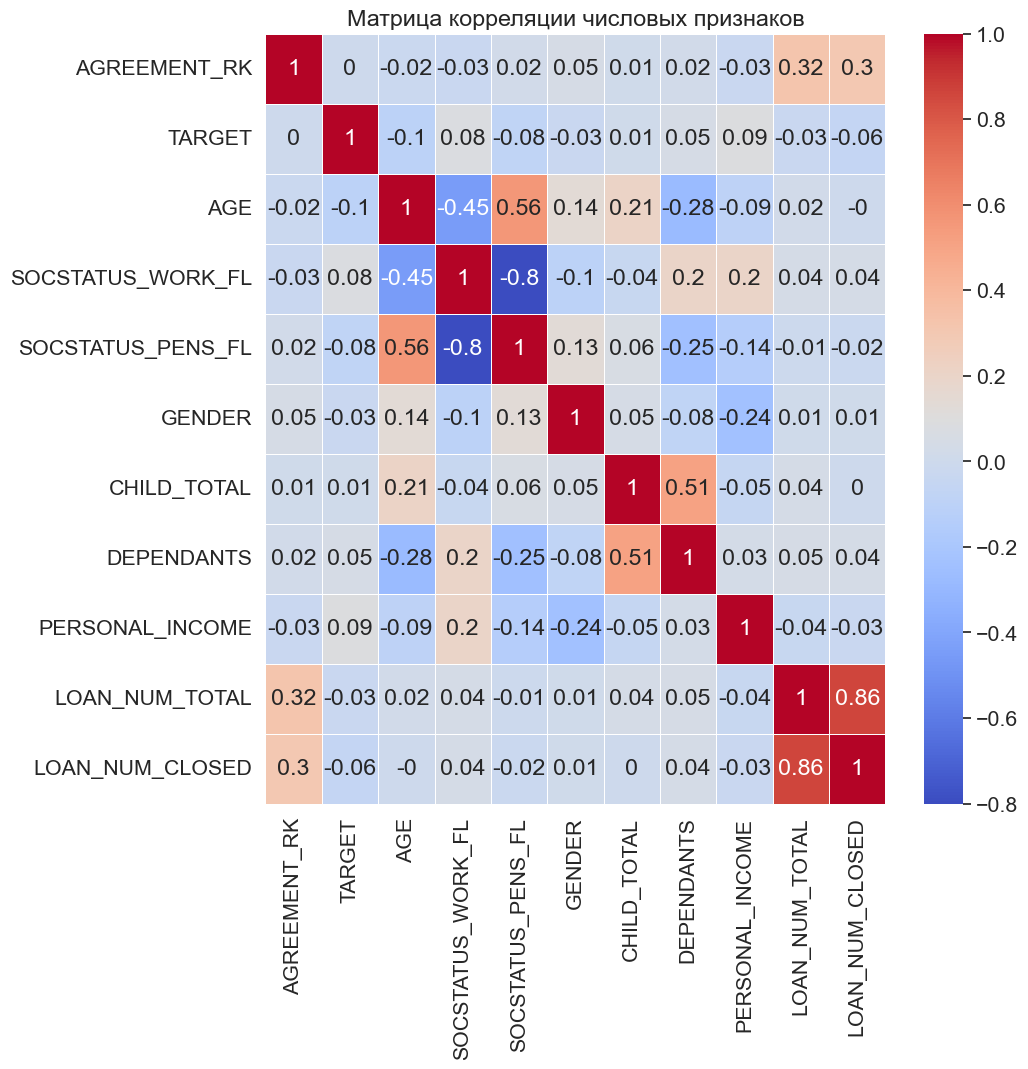

In [53]:
# сделаем картинку корреляции и добавим в streamlit
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.4)
cor_matrix = round(uniod_data.corr(),2)
sns.heatmap(cor_matrix, annot = True, linewidths = .5, cmap = 'coolwarm')

plt.title("Матрица корреляции числовых признаков")
plt.savefig('corr_matrix.png')
plt.show()